In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [23]:
import pickle
with open("face_embeddings.pkl", "rb") as f:
    loaded_embeddings = pickle.load(f)
with open("target_embeddings.pkl", "rb") as f:
    target_embeddings = pickle.load(f)

In [25]:
loaded_embeddings

{'face_0.jpg': array([-1.70849428e-01,  1.89070791e-01,  5.56415282e-02, -7.29355961e-02,
        -1.87689260e-01, -7.18919188e-02, -3.83153111e-02, -8.21529105e-02,
         1.44305378e-01,  1.15828760e-01,  2.96449035e-01, -5.80054224e-02,
        -3.06004226e-01,  9.27109388e-04, -9.19622928e-02,  1.08412117e-01,
        -1.84557512e-01, -6.35987297e-02, -3.55751179e-02, -2.48221122e-02,
         5.63983694e-02,  1.94437150e-02,  7.37055317e-02,  1.19314894e-01,
        -1.50953876e-02, -3.29911530e-01, -6.34437278e-02, -9.79037806e-02,
         1.81647092e-01, -1.13268636e-01, -6.94917701e-03,  7.76625201e-02,
        -2.54124403e-01, -1.88829750e-01,  3.40633690e-02,  1.12172119e-01,
        -8.92372355e-02, -1.17623232e-01,  3.04590374e-01, -1.99683942e-04,
        -8.69041309e-02,  5.00626191e-02,  1.97757576e-02,  3.11249644e-01,
         1.00814693e-01,  5.57864383e-02,  2.77056191e-02, -1.02825306e-01,
         1.07157327e-01, -2.44074658e-01,  1.21880814e-01,  2.48852491e-01

In [27]:
target_embeddings

{'target': array([-7.41541311e-02,  1.11362495e-01,  1.80595338e-01, -2.16622860e-03,
        -2.66617630e-02, -7.04866648e-02, -3.35126184e-02, -1.33851439e-01,
         1.36086136e-01, -9.94588658e-02,  2.82906234e-01,  2.67320313e-02,
        -2.25747257e-01,  1.92620587e-02, -9.55384299e-02,  1.37345135e-01,
        -1.70275748e-01, -7.74947777e-02, -8.72712657e-02, -5.72809204e-02,
        -3.24811265e-02,  8.78848583e-02,  7.35642537e-02, -1.87044516e-02,
        -1.04435809e-01, -3.43003213e-01, -1.55679360e-01, -5.09215184e-02,
         7.25713372e-02, -5.95395379e-02,  2.00185888e-02,  5.37773483e-02,
        -1.42163038e-01, -3.69611569e-02,  3.37941796e-02,  1.27424672e-02,
        -6.76593408e-02, -1.24657162e-01,  1.88427553e-01,  8.21467191e-02,
        -1.17565408e-01,  3.58896889e-02,  6.32005632e-02,  3.24590623e-01,
         2.12191552e-01,  4.91653010e-03,  6.74125180e-02, -1.52802795e-01,
         3.66412960e-02, -2.60702699e-01,  9.64254588e-02,  1.25657082e-01,
  

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

target = target_embeddings['target']
target_emb = np.array(target).reshape(1, -1)  # Ensure 2D shape

best_match = None
best_score = -1 

for filename, embedding in loaded_embeddings.items():
    embedding = np.array(embedding).reshape(1, -1)  # Ensure 2D shape
    similarity = cosine_similarity(target_emb, embedding)[0][0]  # Compute cosine similarity
    
    if similarity > best_score:
        best_score = similarity
        best_match = filename

print(f"Most similar embedding is from: {best_match} with similarity score: {best_score:.4f}")


Most similar embedding is from: face_2.jpg with similarity score: 0.9359


In [29]:
print(target_embeddings.keys())  # Check available keys

dict_keys(['target'])


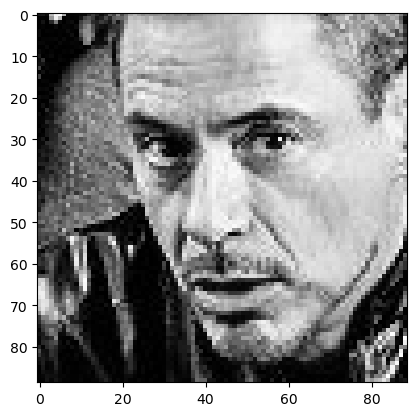

In [35]:
import os
file_path = os.path.join('StoredFaces',best_match )
img = cv2.imread(file_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')